In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from autograd.Value_engine import Value
from autograd.Viz import draw_graph
from autograd.MLP import MLP, Neuron, Layer

In [6]:
x1 = Value(1, label='x1')
x2 = Value(0, label='x2')
w1 = Value(-0.7, label='w1')
w2 = Value(0.2, label='w2')
b = Value(0.45, label='b')
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
in_prod = x1w1 + x2w2; in_prod.label='x1w1 + x2w2'
n = in_prod + b; n.label='n'
e = (2*n).exp()
o = (e -1) / (e + 1); o.label='o'
# o = n.tanh(); o.label='o'
o.backward()

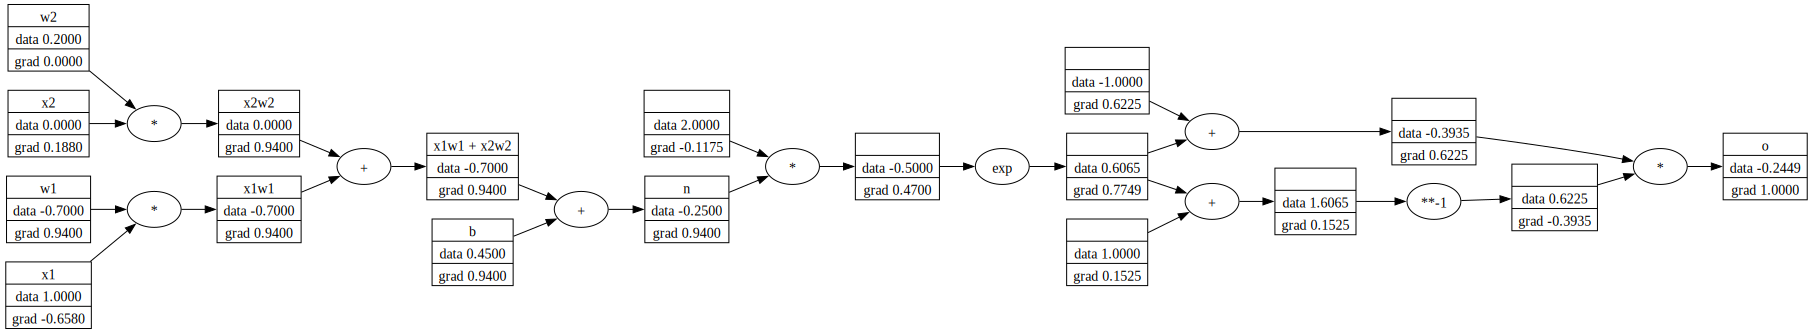

In [7]:
draw_graph(o)

In [8]:
def mse_loss(ypred, ytrue):
  loss = sum((ypred_i - ytrue_i)**2 for ypred_i, ytrue_i in zip(ypred, ytrue))
  return loss

xs = [[2,3,-1],
      [3,-1,0.5],
      [0.5,1,1],
      [1,1,-1]]

ys = [1.0,-1.0,-1.0,1.0]

In [9]:
model = MLP(3, [4,4,1])

In [10]:
lr = 0.1

loss_all = 0

for epoch in range(100):
    # forward pass
    ypreds = [model(x) for x in xs]
    loss = mse_loss(ypreds, ys)

    # backward pass
    loss.backward()

    # update
    params = model.parameters()
    # print(f'grad {params[0].grad: 0.4f}')
    for p in model.parameters():
      p.data -= lr*p.grad
      p.grad = 0.0

    if epoch % 5 == 0:
      print(f'epoch {epoch}, loss {loss.data: 0.4f}')

epoch 0, loss  7.5165
epoch 5, loss  1.3718
epoch 10, loss  0.0927
epoch 15, loss  0.0440
epoch 20, loss  0.0281
epoch 25, loss  0.0203
epoch 30, loss  0.0158
epoch 35, loss  0.0128
epoch 40, loss  0.0107
epoch 45, loss  0.0092
epoch 50, loss  0.0080
epoch 55, loss  0.0071
epoch 60, loss  0.0064
epoch 65, loss  0.0058
epoch 70, loss  0.0053
epoch 75, loss  0.0048
epoch 80, loss  0.0045
epoch 85, loss  0.0042
epoch 90, loss  0.0039
epoch 95, loss  0.0036


In [11]:
outs = [model(x) for x in xs]
outs

[Value(data=0.9727260589162301, label=),
 Value(data=-0.9953853407758724, label=),
 Value(data=-0.9639165919078663, label=),
 Value(data=0.9633174514888394, label=)]

Moon dataset - MLP
---

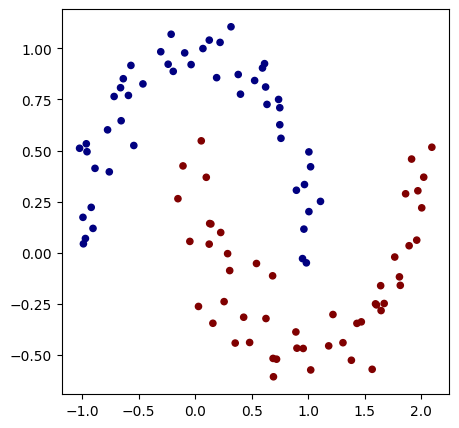

In [12]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [13]:
model = MLP(2, [10,10,1])
print(f'number of params: {len(model.parameters())}')

number of params: 130


In [14]:
lr = 0.01

loss_all = 0

for epoch in range(100):
    # forward pass
    ypreds = [model(x) for x in X]
    loss = mse_loss(ypreds, y)

    # backward pass
    for p in model.parameters():
      p.grad = 0.0

    loss.backward()

    # update
    for p in model.parameters():
      p.data -= lr*p.grad

    if epoch % 5 == 0:
      print(f'epoch {epoch}, loss {loss.data: 0.4f}')

epoch 0, loss  128.9029
epoch 5, loss  39.0586
epoch 10, loss  36.9372
epoch 15, loss  44.6357
epoch 20, loss  35.3677
epoch 25, loss  31.5205
epoch 30, loss  33.8692
epoch 35, loss  45.0181
epoch 40, loss  32.0596
epoch 45, loss  25.5632
epoch 50, loss  22.3865
epoch 55, loss  87.6063
epoch 60, loss  21.7855
epoch 65, loss  31.1997
epoch 70, loss  33.8553
epoch 75, loss  8.9890
epoch 80, loss  14.4577
epoch 85, loss  5.4083
epoch 90, loss  4.7265
epoch 95, loss  2.2467


(-1.6065445793629283, 1.8934554206370717)

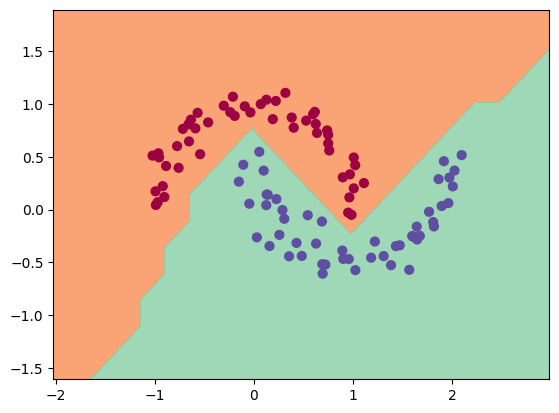

In [15]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())